In [4]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 325.1 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/81.9 kB 325.1 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 163.4 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 306.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
from sklearn.preprocessing import MaxAbsScaler

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Чтение данных
data = pd.read_csv('data.csv')
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True


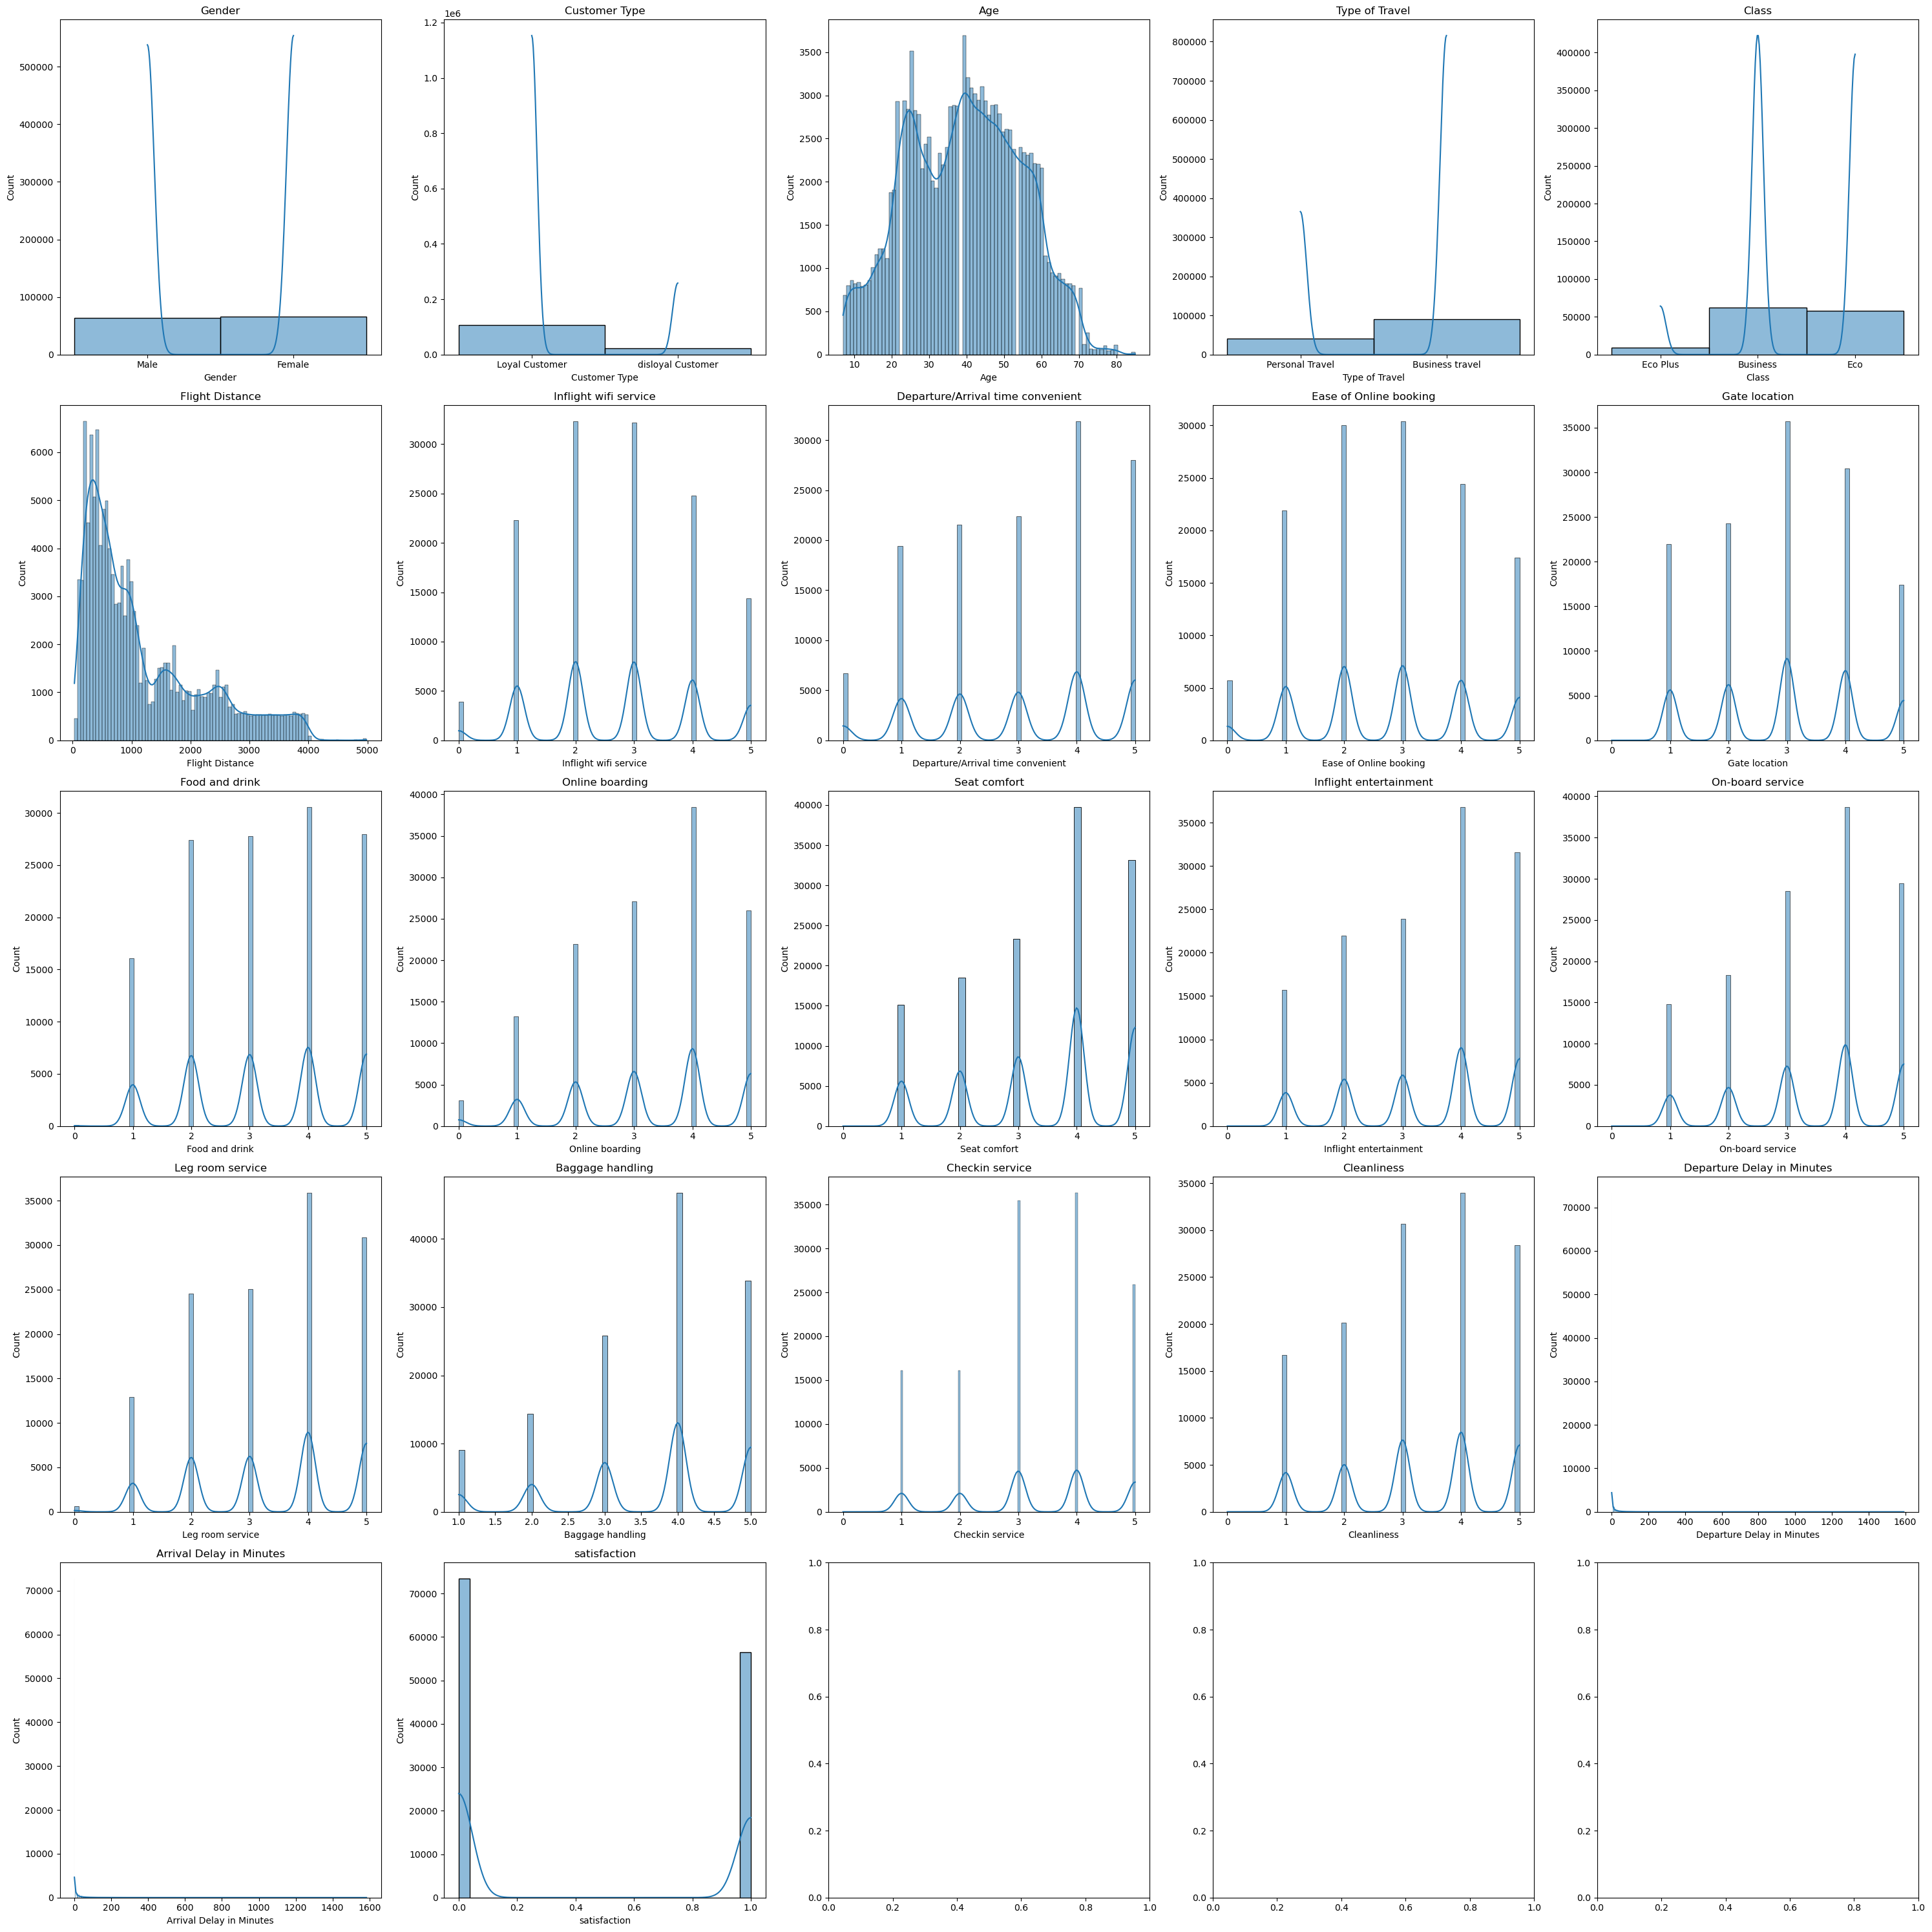

In [22]:
#Проводим визуальный осмотр данный на выбросы
df = data
fig, axes = plt.subplots(5, 5, figsize=(30, 30))

# Цикл для построения графиков
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], ax=axes[i//5, i%5], kde=True)
    axes[i//5, i%5].set_title(column)

# Настройка отображения
plt.tight_layout()

# Отображение графиков
plt.show()

In [23]:
#Разделение на тестовую и тренировочную выборки
Y = data['satisfaction'].to_numpy()
data = data.drop('satisfaction', axis = 1)

In [24]:
#Проверка на NaN
data.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

In [25]:
#Пробуем заменить NaN на среднее
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

In [26]:
data.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
dtype: bool

In [27]:
#замена нескольких категориальных параметров
encoder = BinaryEncoder(cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
data_enc = encoder.fit_transform(data)

data_enc.head()

,Gender_0,Gender_1,Customer Type_0,Customer Type_1,Age,Type of Travel_0,Type of Travel_1,Class_0,Class_1,Flight Distance,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,1,13,0,1,0,1,460,...,3,5,5,4,3,4,4,5,25,18.0
1,0,1,1,0,25,1,0,1,0,235,...,3,1,1,1,5,3,1,1,1,6.0
2,1,0,0,1,26,1,0,1,0,1142,...,5,5,5,4,3,4,4,5,0,0.0
3,1,0,0,1,25,1,0,1,0,562,...,2,2,2,2,5,3,1,2,11,9.0
4,0,1,0,1,61,1,0,1,0,214,...,5,5,3,3,4,4,3,3,0,0.0


In [28]:
#Разделение данных на тестовую и тренировочную выборки

X = data_enc.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [29]:
# Тренируем модель без дополнительного исследования данных
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
Predict = model.predict(x_test)
pres_score = precision_score(y_test, Predict)
#recall_score = recall_score(y_test, Predict)
#f1_score = f1_score(y_test, Predict)
print(score, pres_score, recall_score, f1_score)

0.8484139205420388 0.8131463871729021 <function recall_score at 0x00000174373462A0> <function f1_score at 0x0000017437345940>


In [31]:
#Нормализуем данные и проверим улучшение результата
X = data_enc
scaler = MaxAbsScaler()
scaler.fit(X)
scaled = scaler.transform(X)
scaled_X = pd.DataFrame(scaled, columns=X.columns)


In [32]:
X = scaled_X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
Predict = model.predict(x_test)
pres_score = precision_score(y_test, Predict)
#recall_score = recall_score(y_test, Predict)
#f1_score = f1_score(y_test, Predict)
print(score, pres_score)

0.874314752078842 0.8693040293040293


In [ ]:
#Результат улучшился. Попробуем провести Анализ данных и выбрать полезные факторы

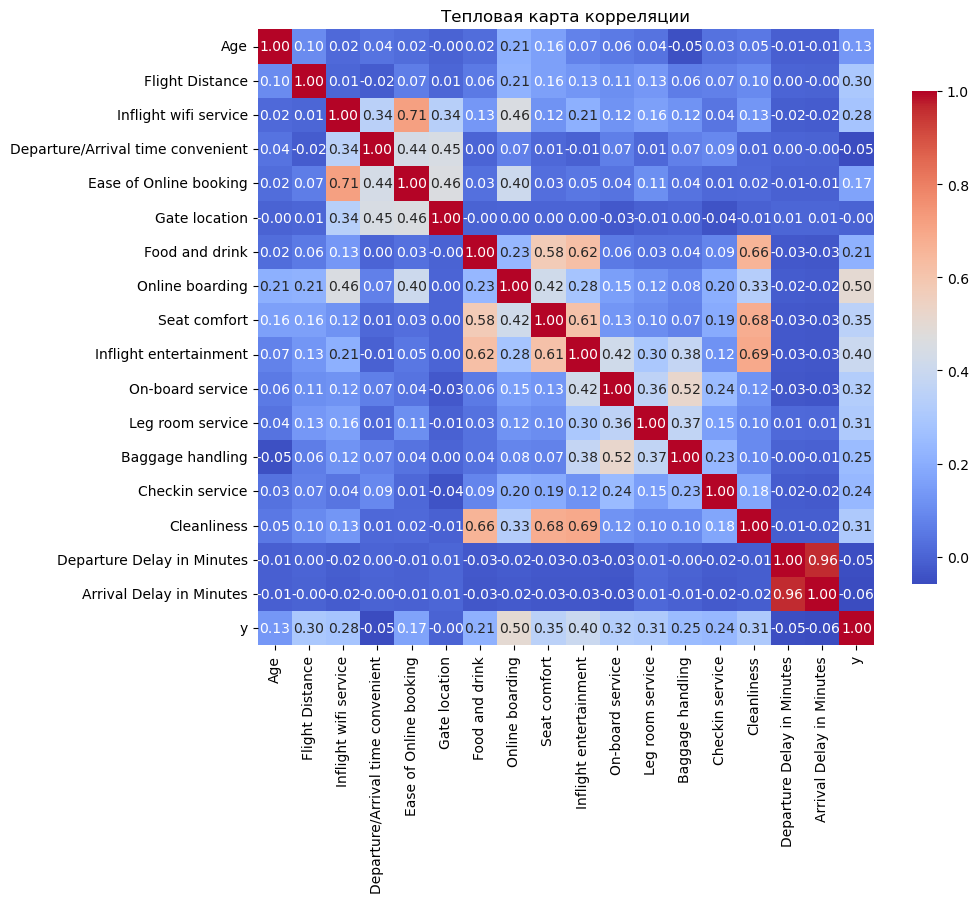

In [35]:
#Матрица кореляции чтобы увидеть зависимость факторов друг от друга и какие факторы больше всего влияют на конечное значение
for_corr = data
for_corr['y'] = Y
corr = for_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляции')
plt.show()

In [45]:
#Как можно заметить сильно на итоговое значение влияет параметр 
#Online bourding проверим насколько разные значения реально влияют на результат
for_corr.groupby(['Online boarding', 'y'], as_index = False).agg({'Gender':'count'}).pivot('y', 'Online boarding', 'Gender')

Online boarding,0,1,2,3,4,5
y,,,,,,
False,1341,11434,19422,23385,14502,3368
True,1739,1827,2512,3732,23966,22652


In [ ]:
#Замети что и правда большие значения Online boarding сильно влияют на удовлетворенность полетом

In [46]:
numeric_factors = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_factors = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

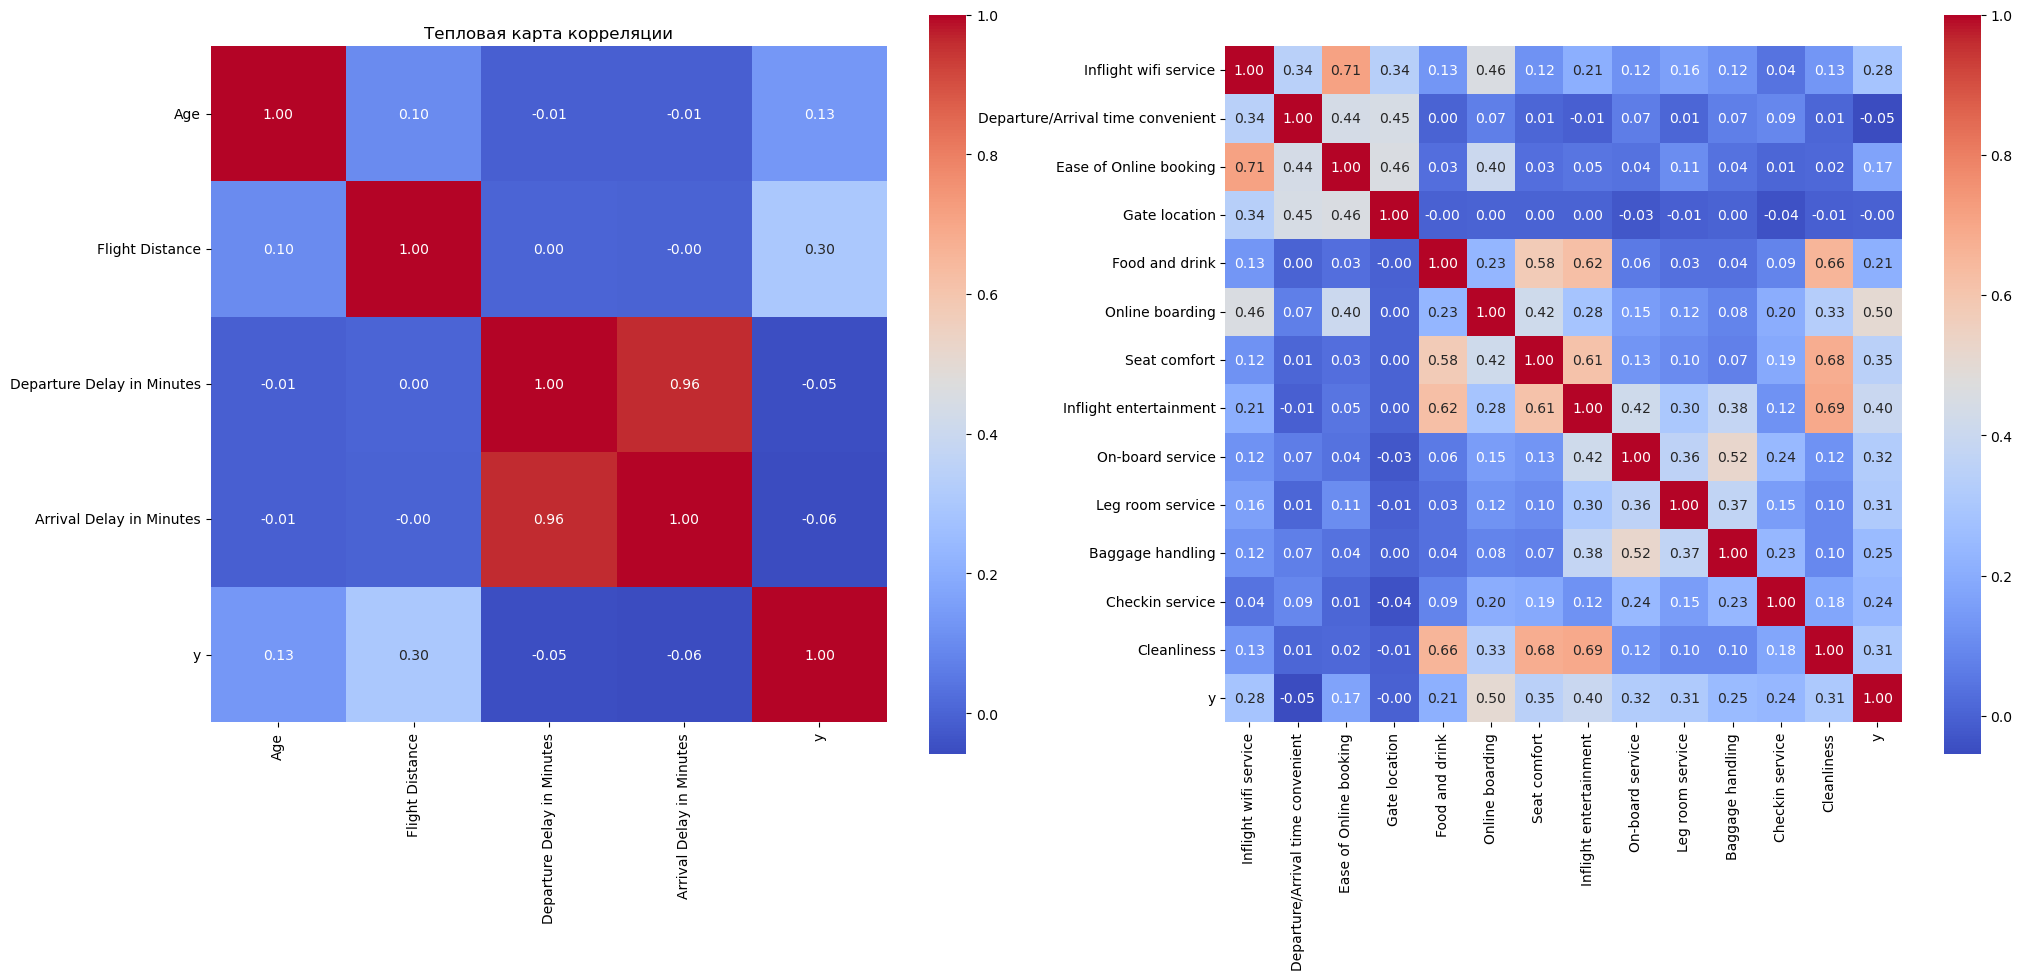

In [51]:
#Рассмотрим отдельно кареляции численных и категориальных факторов
for_corr = data[numeric_factors]
for_corr['y'] = Y
corr = for_corr.corr()

fig, axes = plt.subplots(1, 2, figsize=(24, 12))  # 1 строка, 2 колонки

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Тепловая карта корреляции')

for_corr = data[categorical_factors + ['y']]
corr = for_corr.corr()

sns.heatmap(corr, annot=True, fmt = ".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[1])

plt.show()

In [52]:
useless_factors = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gate location', 'Departure/Arrival time convenient']

In [54]:
Data_droped = data_enc.drop(useless_factors, axis = 1)

In [59]:
#Нормализуем данные и проверим улучшение результата
X = Data_droped
scaler = MaxAbsScaler()
scaler.fit(X)
scaled = scaler.transform(X)
scaled_X = pd.DataFrame(scaled, columns=X.columns)

In [60]:
X = scaled_X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
Predict = model.predict(x_test)
pres_score = precision_score(y_test, Predict)
#recall_score = recall_score(y_test, Predict)
#f1_score = f1_score(y_test, Predict)
print(score, pres_score)

0.8709578072066523 0.8649629629629629
